<a href="https://colab.research.google.com/github/Abhinav-2412/javascript-practice/blob/main/Abhinav_Soni_OR_PRACTICALS_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practical 1 – Formulate and Solve Linear Programming Problem (LPP) with Graph

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -12.0
              x: [ 4.000e+00  0.000e+00]
            nit: 2
          lower:  residual: [ 4.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  1.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00]
                 marginals: [-3.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


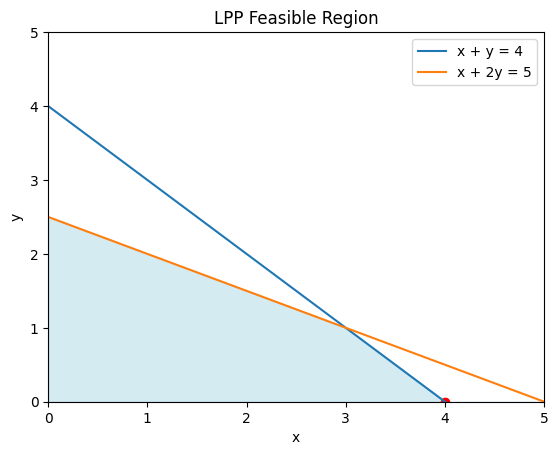

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Maximize Z = 3x + 2y
# Subject to: x + y <= 4, x + 2y <= 5, x >= 0, y >= 0
c = [-3, -2]
A = [[1, 1], [1, 2]]
b = [4, 5]
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print(res)

# Plot feasible region
x = np.linspace(0,5,100)
y1 = 4 - x
y2 = (5 - x)/2
plt.plot(x, y1, label='x + y = 4')
plt.plot(x, y2, label='x + 2y = 5')
plt.xlim(0,5); plt.ylim(0,5)
plt.fill_between(x, 0, np.minimum(y1, y2), color='lightblue', alpha=0.5)
plt.scatter(res.x[0], res.x[1], color='red')
plt.title('LPP Feasible Region')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.show()


### Practical 2 – Solve Linear Programming Problem using Simplex Method

In [8]:

from scipy.optimize import linprog

c = [-2, -3, -4]
A = [[3, 2, 1], [2, 5, 3]]
b = [10, 15]
res = linprog(c, A_ub=A, b_ub=b, method='highs')
print(res)


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -20.0
              x: [ 0.000e+00  0.000e+00  5.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  0.000e+00  5.000e+00]
                 marginals: [ 6.667e-01  3.667e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 5.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.333e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


### Practical 3 – Formulate Primal and Dual Problems

In [3]:
!pip install pulp -q
from pulp import *

# Primal
P = LpProblem("Primal", LpMaximize)
x1, x2 = LpVariable('x1',0), LpVariable('x2',0)
P += 3*x1 + 5*x2
P += x1 + 2*x2 <= 8
P += 3*x1 + 2*x2 <= 12
P.solve()
print(f"Primal → x1={value(x1)}, x2={value(x2)}, Z={value(P.objective)}")

# Dual
D = LpProblem("Dual", LpMinimize)
y1, y2 = LpVariable('y1',0), LpVariable('y2',0)
D += 8*y1 + 12*y2
D += y1 + 3*y2 >= 3
D += 2*y1 + 2*y2 >= 5
D.solve()
print(f"Dual → y1={value(y1)}, y2={value(y2)}, W={value(D.objective)}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 100.6 MB/s eta 0:00:00
Primal → x1=2.0, x2=3.0, Z=21.0
Dual → y1=2.25, y2=0.25, W=21.0


### Practical 4 – Implement PERT/CPM

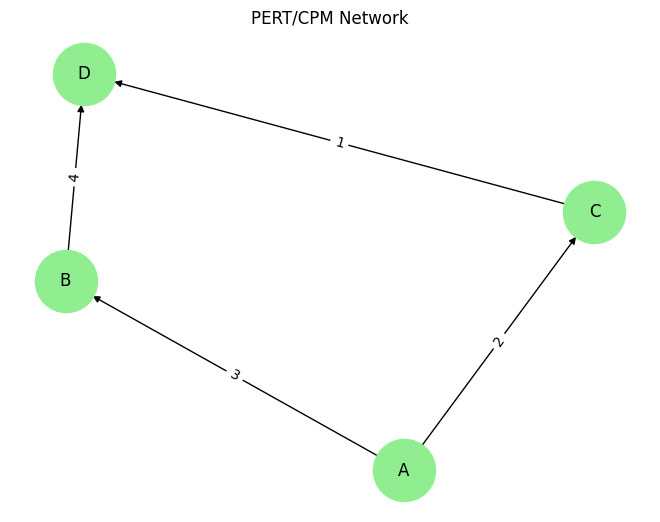

In [4]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
edges = [('A','B',3), ('A','C',2), ('B','D',4), ('C','D',1)]
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("PERT/CPM Network")
plt.show()


### Practical 5 – Solve Transportation Problem using VAM

In [5]:

import numpy as np
from scipy.optimize import linprog

cost = np.array([[19,30,50,10],
                 [70,30,40,60],
                 [40,8,70,20]])
supply = np.array([7,9,18])
demand = np.array([5,8,7,14])

num_sources, num_dest = cost.shape
c = cost.flatten()
A_eq = []
b_eq = []

for i in range(num_sources):
    row = np.zeros(cost.size)
    row[i*num_dest:(i+1)*num_dest] = 1
    A_eq.append(row)
    b_eq.append(supply[i])

for j in range(num_dest):
    col = np.zeros(cost.size)
    col[j::num_dest] = 1
    A_eq.append(col)
    b_eq.append(demand[j])

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=(0,None), method='highs')
print("Total Minimum Cost:", res.fun)


Total Minimum Cost: 743.0


### Practical 6 – Address Degeneracy using Stepping Stone Method (Simplified Example)

In [13]:
# Practical 6 – Degeneracy in Transportation Problem
import numpy as np

cost = np.array([[19,30,50,10],[70,30,40,60],[40,8,70,20]])
supply, demand = [7,9,18], [5,8,7,14]
alloc = np.zeros((3,4))
i = j = 0

# NW-corner method
while i<3 and j<4:
    q = min(supply[i], demand[j])
    alloc[i,j] = q
    supply[i]-=q; demand[j]-=q
    if supply[i]==0 and i<2: i+=1
    elif demand[j]==0 and j<3: j+=1
    else:
        if supply[i]==0: i+=1
        if demand[j]==0: j+=1

# Handle degeneracy
basics = np.count_nonzero(alloc)
needed = 3+4-1
if basics<needed:
    zeros = np.argwhere(alloc==0)
    for z in zeros[:needed-basics]: alloc[tuple(z)] = 1e-3

print("Adjusted allocation:\n", alloc)


Adjusted allocation:
 [[ 5.  2.  0.  0.]
 [ 0.  6.  3.  0.]
 [ 0.  0.  4. 14.]]


### Practical 7 – Two Player Zero-Sum Game

In [9]:

import numpy as np
from scipy.optimize import linprog

A = np.array([[3,2],[4,1]])
c = [-1,-1]
A_ub = -A.T
b_ub = -np.ones(2)
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0,None))
print(res)


       message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)
       success: False
        status: 3
           fun: None
             x: None
           nit: 1
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None


### Practical 8 – Economic Order Quantity (EOQ) Model

----EOQ Model----
EOQ = 346.41 units/order
Total Annual Cost = ₹692.82


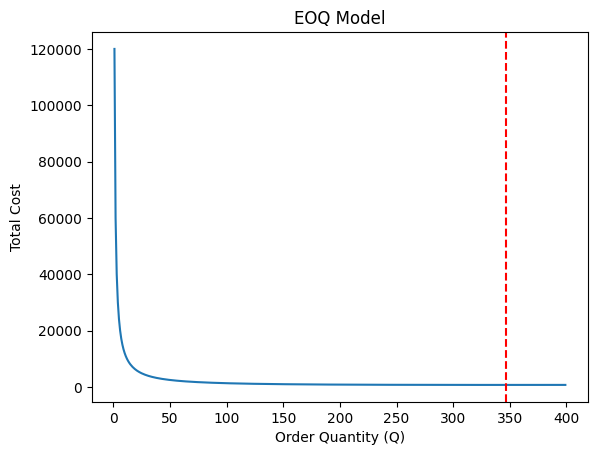

In [10]:

import math
import matplotlib.pyplot as plt

D, S, H = 1200, 100, 2
EOQ = math.sqrt((2*D*S)/H)
TC = (D/EOQ)*S + (EOQ/2)*H

print("----EOQ Model----")
print(f"EOQ = {EOQ:.2f} units/order")
print(f"Total Annual Cost = ₹{TC:.2f}")

Q = range(1, 400)
TC_values = [(D/q)*S + (q/2)*H for q in Q]
plt.plot(Q, TC_values)
plt.axvline(EOQ, color='red', linestyle='--')
plt.title('EOQ Model')
plt.xlabel('Order Quantity (Q)')
plt.ylabel('Total Cost')
plt.show()
